<a href="https://colab.research.google.com/github/JyothiSupriya/Multi-Model-NLP-Framework-for-Unstructured-Text-Analysis/blob/main/EBI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import string
from nltk.corpus import stopwords
import json
import glob
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('/content/Data.xlsx')

# Show the content of the DataFrame
print(df)

In [ ]:

narrative = df['NARRATIVE']
cause=df['CAUSE']

In [ ]:
def load_data(file):
    with open (file, "r", encoding="utf-8") as f:
        data = json.load(f)
    return (data)

In [ ]:
def remove_stops(text, stops):
    text = text.lower()
    text = re.sub(r"AC\/\d{1,4}\/\d{1,4}", "", text)
    words = text.split()
    final = []
    for word in words:
        if word not in stops:
            final.append(word)
    final = " ".join(final)
    final = final.translate(str.maketrans("", "", string.punctuation))
    final = "".join([i for i in final if not i.isdigit()])
    while "  " in final:
        final = final.replace("  ", " ")
    return (final)

def clean_docs(docs):
    stops = stopwords.words("english")
    months = load_data("/content/months.json") #Create a json file here with the following data
    #["january", "february", "march", "april", "may", "june", "july", "august", "september", "october", "november", "december"]
    stops = stops+months
    final = []
    for doc in docs:
        clean_doc = remove_stops(doc, stops)
        final.append(clean_doc)
    return (final)

In [ ]:
cleaned_narratives = clean_docs(df['NARRATIVE'].astype(str)) # Convert the Series to string type
print(cleaned_narratives[2])
print(df['NARRATIVE'][2])

investigation mississippi public service commission phmsa parties ongoing direction national transportation safety board ntsb accordingly responses report supplemented information permitted released ntsb
THE INVESTIGATION, TO WHICH THE MISSISSIPPI PUBLIC SERVICE COMMISSION AND PHMSA ARE PARTIES, IS ONGOING UNDER THE DIRECTION OF THE NATIONAL TRANSPORTATION SAFETY BOARD (NTSB).  ACCORDINGLY, THE RESPONSES IN THE REPORT WILL BE SUPPLEMENTED WHEN THE INFORMATION IS PERMITTED TO BE RELEASED BY THE NTSB.


In [ ]:
vectorizer = TfidfVectorizer(
                                lowercase=True,
                                max_features=100,
                                max_df=0.8, #Edit
                                min_df=5, #Edit
                                ngram_range = (1,3),
                                stop_words = "english"

                            )

In [ ]:
vectors = vectorizer.fit_transform(cleaned_narratives)

# Use get_feature_names_out() for newer scikit-learn versions
feature_names = vectorizer.get_feature_names_out()

dense = vectors.todense()
denselist = dense.tolist()

all_keywords = []

for description in denselist:
    x=0
    keywords = []
    for word in description:
        if word > 0:
            keywords.append(feature_names[x])
        x=x+1
    all_keywords.append(keywords)
print (cleaned_narratives[0])
print (all_keywords[0])

 around pm g underground sub onyx consulting working sparklight pulling back fiber conduit directional drilling rig damaged poly main makeshift attachment expands bore hole originally bored main damaged potholed prior contractor boring main properly correctly marked flagged usic escaping gas damaged poly main migrated ave resulting ignition gas
['contractor', 'damaged', 'ignition', 'main', 'pm']


In [ ]:
def write_data(file, data):
    with open (file, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)

In [ ]:
true_k = 8

model = KMeans(n_clusters=true_k, init="k-means++", max_iter=100, n_init=1)

model.fit(vectors)

order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

with open ("/content/trc_results.txt", "w", encoding="utf-8") as f:#create a empty file here.
    for i in range(true_k):
        f.write(f"Cluster {i}")
        f.write("\n")
        for ind in order_centroids[i, :10]:
            f.write (' %s' % terms[ind],)
            f.write("\n")
        f.write("\n")
        f.write("\n")



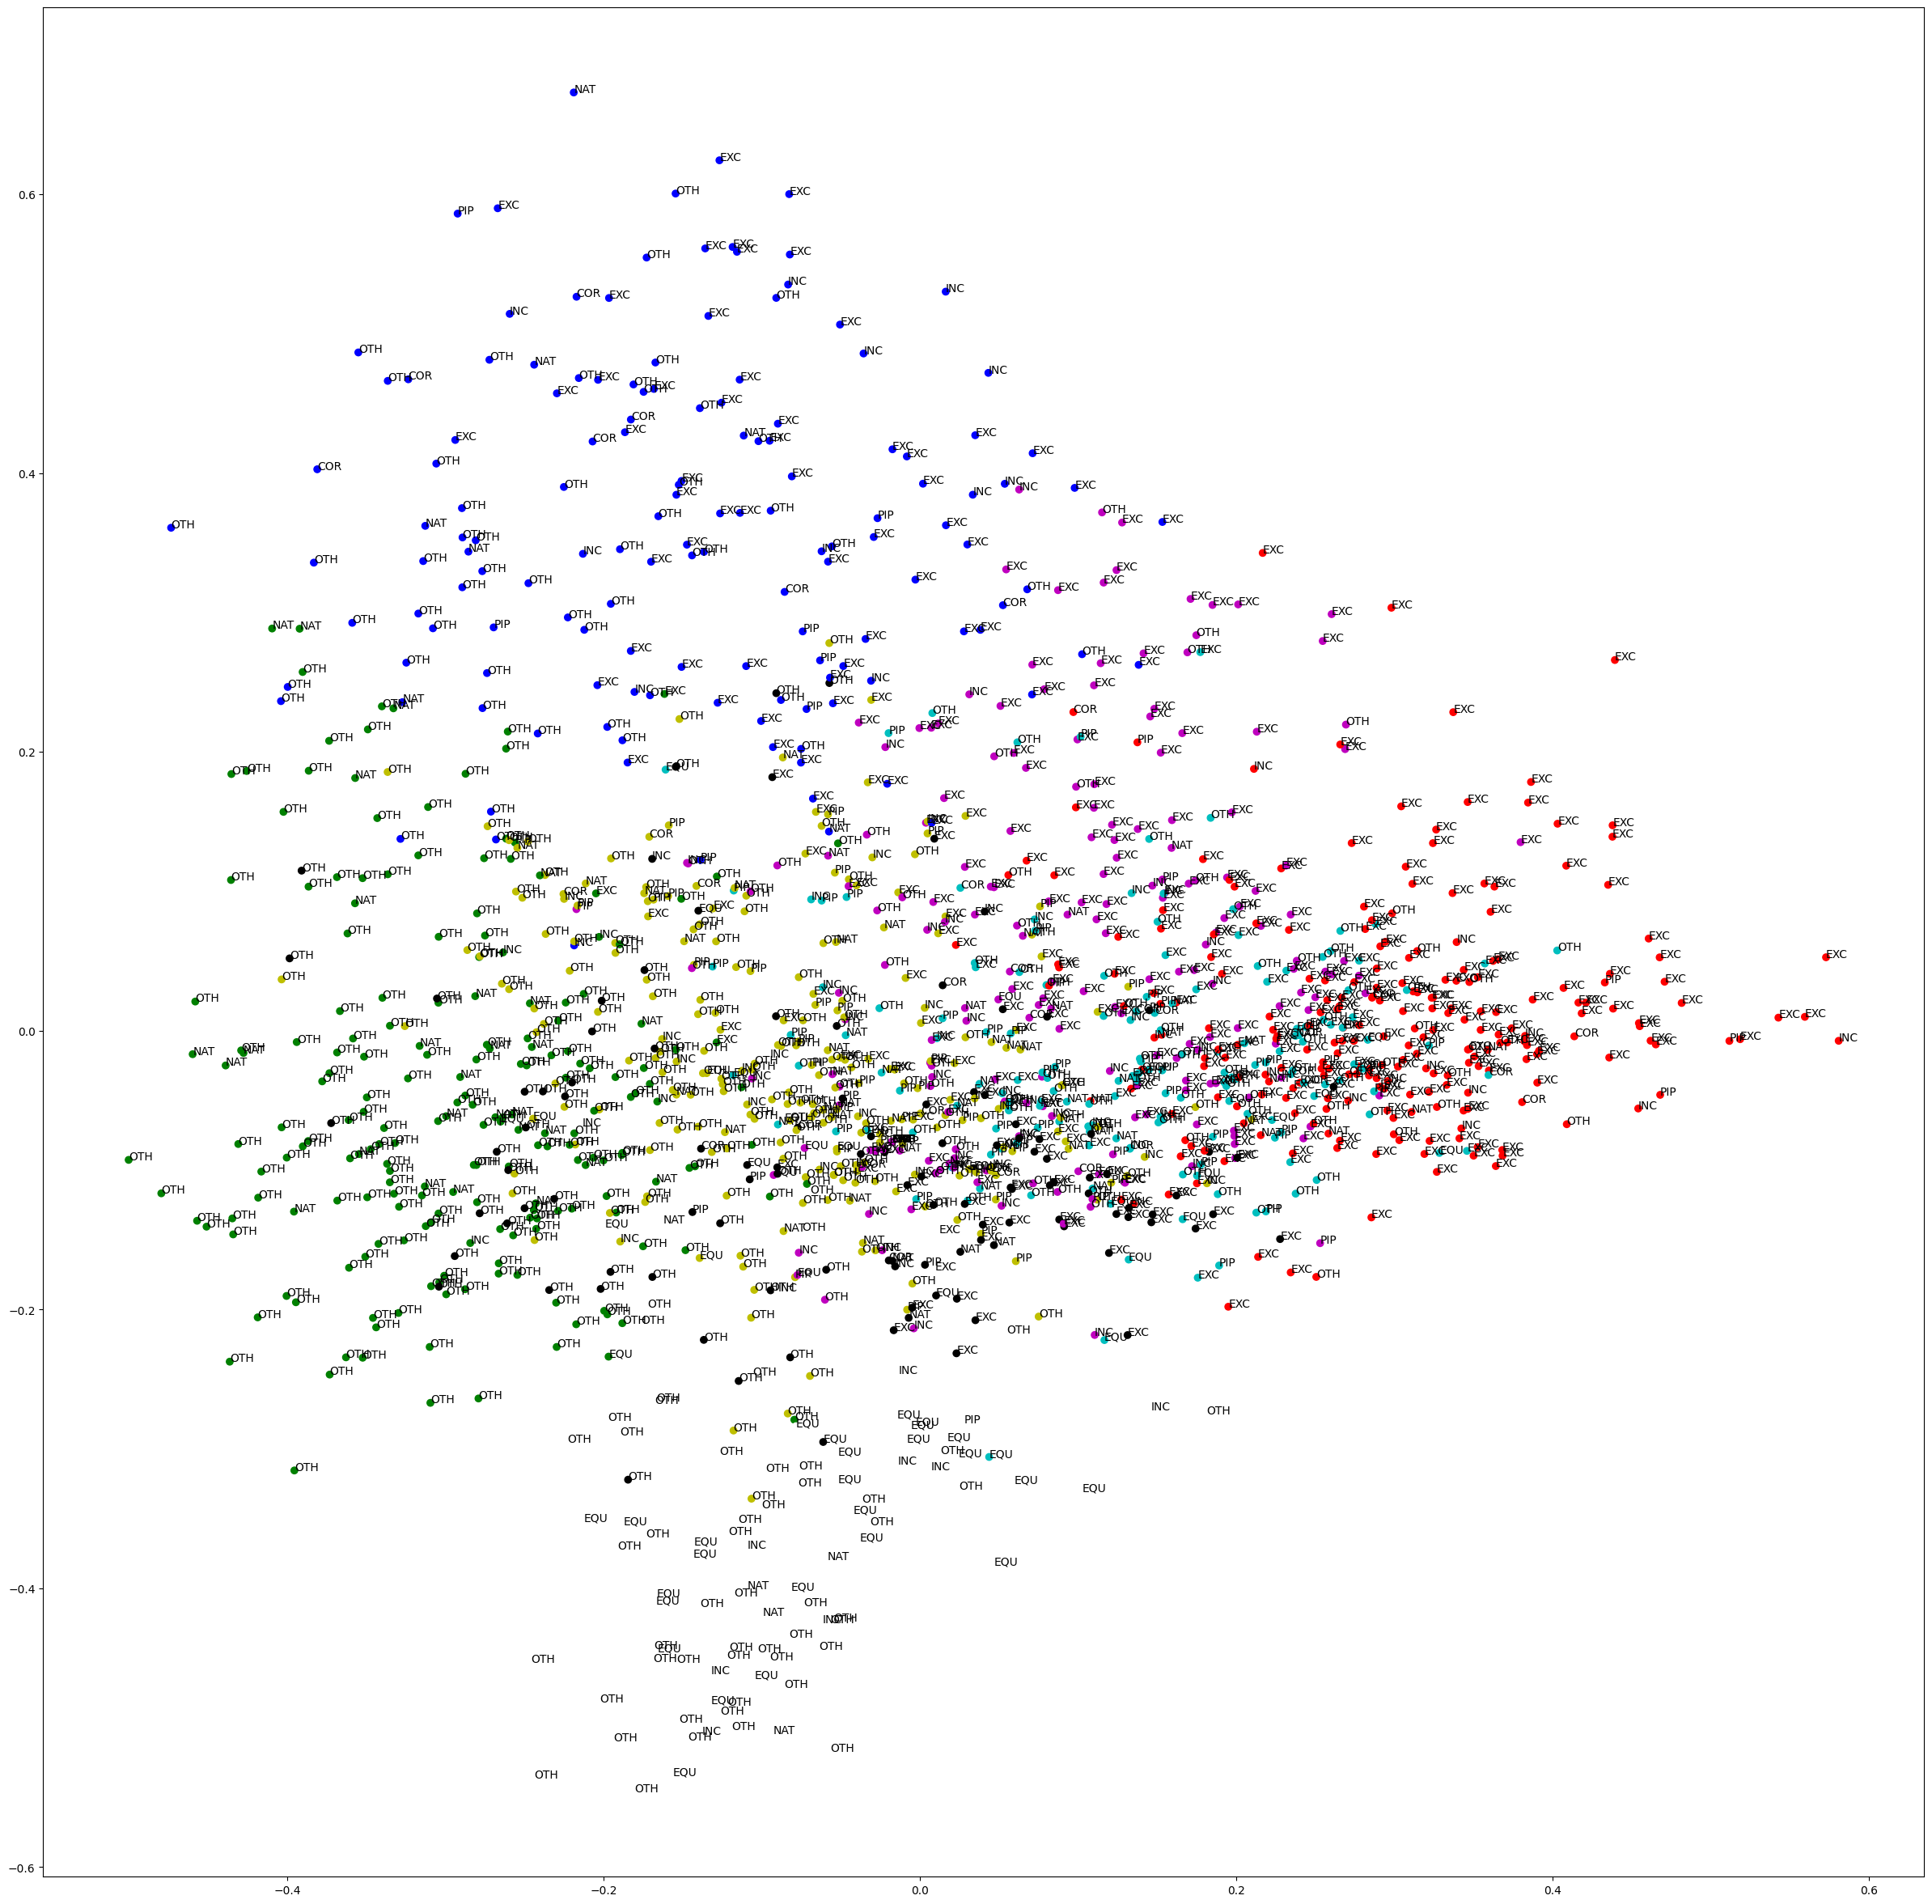

In [ ]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

kmean_indices = model.predict(vectors)

pca = PCA(n_components=2)
# Use fit_transform to both fit and transform the data in one step
scatter_plot_points = pca.fit_transform(vectors.toarray())

colors = ["r", "b", "g", "y", "m","c","w","k"]

x_axis = [o[0] for o in scatter_plot_points]
y_axis = [o[1] for o in scatter_plot_points]

fig, ax = plt.subplots(figsize=(30, 30))

ax.scatter(x_axis, y_axis, c=[colors[d] for d in kmean_indices])

for i, txt in enumerate(df['CAUSE']):
    ax.annotate(txt[0:3], (x_axis[i], y_axis[i]))

plt.show()

### LDA

In [ ]:
!pip install pyLDAvis --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 27.3 MB/s eta 0:00:00


In [ ]:
import numpy as np
import json
import glob

#Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pandas as pd

#spacy
import spacy
from nltk.corpus import stopwords
#vis

import pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

stopwords = stopwords.words("english")
print(stopwords)

df = pd.read_excel('/content/Data.xlsx',usecols=['NARRATIVE'])
print(df)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
data = df['NARRATIVE'].values.tolist() # Access the 'NARRATIVE' column instead of 'descs'
print(data[0][0:90])
type(data)

ON JANUARY 29 2024, AROUND 4:40PM G3 UNDERGROUND (SUB OF ONYX CONSULTING WORKING FOR SPARK


list

In [ ]:
data = [str(element) for element in data]

In [ ]:
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return (texts_out)


lemmatized_texts = lemmatization(data)
print (lemmatized_texts[0][0:90])

onyx consulting work SPARKLIGHT pull fiber CONDUIT drilling POLY makeshift attachment expa


In [ ]:
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return (final)

data_words = gen_words(lemmatized_texts)

print (data_words[0][0:20])

['onyx', 'consulting', 'work', 'sparklight', 'pull', 'fiber', 'conduit', 'drilling', 'poly', 'makeshift', 'attachment', 'expand', 'bore', 'pothole', 'prior', 'escape', 'migrate', 'result', 'ignition']


In [ ]:
id2word = corpora.Dictionary(data_words)

corpus = []
for text in data_words:
    new = id2word.doc2bow(text)
    corpus.append(new)

print (corpus[0][0:20])

word = id2word[[0][:1][0]]
print (word)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1)]
attachment


In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=30,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
26    -0.200192 -0.477098       1        1  24.893533
18     0.020415 -0.499913       2        1  16.831200
22    -0.378670 -0.341951       3        1  14.807889
28     0.307413 -0.403202       4        1   8.347303
9      0.402258 -0.248718       5        1   6.436449
8      0.473888 -0.073670       6        1   5.091260
10     0.430068  0.202858       7        1   2.497486
0      0.156059 -0.346556       8        1   2.132709
24    -0.410854 -0.109913       9        1   1.810187
19    -0.156338 -0.282788      10        1   1.631998
25    -0.438582  0.075465      11        1   1.617125
7     -0.343195  0.231658      12        1   1.244434
13     0.046654 -0.270162      13        1   1.230682
23    -0.190088 -0.146654      14        1   1.190811
21     0.110097  0.447752      15        1   1.174815
6     -0.086365  0.401939      16        1   1.077390
20    -0.232272  0.350591      17        1   1.048108
17    -0.272216  0.010514      18        1   0.835018
12     0.132205 -0.090685      19        1   0.788570
1      0.253762 -0.010634      20        1   0.771805
2      0.261394  0.119479      21        1   0.739975
14     0.248357  0.276128      22        1   0.718860
27    -0.232037  0.154764      23        1   0.682631
4      0.140138  0.262560      24        1   0.549215
29    -0.101845  0.215902      25        1   0.506688
16     0.023700  0.270118      26        1   0.476475
11    -0.042467  0.001830      27        1   0.365739
5      0.084976  0.078696      28        1   0.225359
3      0.007354  0.124380      29        1   0.211707
15    -0.013614  0.077308      30        1   0.064579, topic_info=          Term         Freq        Total Category  logprob  loglift
70        hour   607.000000   607.000000  Default  30.0000  30.0000
118    service  1929.000000  1929.000000  Default  29.0000  29.0000
184   pressure   898.000000   898.000000  Default  28.0000  28.0000
93       riser   334.000000   334.000000  Default  27.0000  27.0000
320  regulator   304.000000   304.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
23       party     0.009087    66.420721  Topic30  -8.5119  -1.5519
24      permit     0.009087     2.735656  Topic30  -8.5119   1.6378
25     release     0.009087   175.180738  Topic30  -8.5119  -2.5217
26      report     0.009087  1020.432072  Topic30  -8.5119  -4.2838
27    response     0.009087    13.486944  Topic30  -8.5119   0.0424

[1314 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
58       11  0.933975   abandon
639      17  0.957903     about
671      28  0.845135    accept
673      15  0.978428  accident
258       8  0.268871    accord
...     ...       ...       ...
873      10  0.666323    wrench
873      16  0.222108    wrench
537      29  0.966137      year
1074      4  0.945580       yet
196       8  0.922635      zone

[1060 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[27, 19, 23, 29, 10, 9, 11, 1, 25, 20, 26, 8, 14, 24, 22, 7, 21, 18, 13, 2, 3, 15, 28, 5, 30, 17, 12, 6, 4, 16])

In [ ]:
# Loop through all 30 topics and print the top 10 words for each topic
for i in range(30):  # Loop through topic indices from 0 to 29
    topic_words = lda_model.show_topic(i, topn=10)  # Get the top 10 words for each topic
    print(f"Topic {i}: {topic_words}")


Topic 0: [('hour', 0.40633348), ('fatalities', 0.0730235), ('customer', 0.06238755), ('restore', 0.04501447), ('portion', 0.04116128), ('greater', 0.023400284), ('regulating', 0.01917948), ('marked', 0.01818389), ('squeeze', 0.018087232), ('impact', 0.013977796)]
Topic 1: [('form', 0.08563058), ('minor', 0.068678945), ('question', 0.06339132), ('entry', 0.06037633), ('floor', 0.050392117), ('hear', 0.047058027), ('underground', 0.043342594), ('mark', 0.03862542), ('purge', 0.036695357), ('drilling', 0.02978257)]
Topic 2: [('columbia', 0.14071935), ('outage', 0.08884987), ('commercial', 0.06944545), ('consider', 0.06384163), ('please', 0.0494912), ('poly', 0.04689274), ('safety', 0.046462234), ('vacant', 0.040757395), ('trackhoe', 0.034853112), ('tool', 0.026434107)]
Topic 3: [('year', 0.18867373), ('bury', 0.055277266), ('tank', 0.043473), ('stress', 0.041575), ('improper', 0.033274658), ('no', 0.029835815), ('gallon', 0.023557862), ('become', 0.021975001), ('received', 0.0108463215), 

In [ ]:
from gensim.models import CoherenceModel

# Train your LDA model (example)
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=10,  # Adjust this value
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha='auto',
                                            eta='auto')

# Compute Coherence Score using 'c_v' (most popular coherence measure)
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()  # Get coherence value
print(f'Coherence Score (c_v): {coherence_lda}')

Coherence Score (c_v): 0.43723062539519175


In [ ]:
#BIGRAMS AND TRIGRAMS
bigram_phrases = gensim.models.Phrases(data_words, min_count=2, threshold=10) # play with threshold and also min_count
trigram_phrases = gensim.models.Phrases(bigram_phrases[data_words], threshold=10)

bigram = gensim.models.phrases.Phraser(bigram_phrases)
trigram = gensim.models.phrases.Phraser(trigram_phrases)

def make_bigrams(texts):
    return([bigram[doc] for doc in texts])

def make_trigrams(texts):
    return ([trigram[bigram[doc]] for doc in texts])

data_bigrams = make_bigrams(data_words)
data_bigrams_trigrams = make_trigrams(data_bigrams)

print (data_bigrams_trigrams[750])

['investigation_reveal', 'sewer', 'manhole', 'discover', 'cause', 'damage', 'connection', 'service_line', 'provide', 'service_line', 'connection', 'repaired', 'installation', 'new', 'service_line', 'tap', 'new', 'service', 'connection', 'crack_iron', 'service_line', 'complete', 'inspection', 'at', 'reveal', 'loss', 'support', 'iron', 'service', 'leave', 'repair', 'home', 'employee', 'return', 'restore', 'service', 'residence', 'request', 'restoration', 'inspection', 'make', 'evidence', 'inspector', 'go_back', 'site', 'inspection', 'indication', 'responded', 'emergency', 'call', 'report', 'order', 'create', 'technician', 'begin', 'investigation', 'detect', 'structure', 'make', 'investigation', 'find', 'iron', 'location', 'away', 'instal', 'well', 'preserve', 'corrosion', 'shallow', 'corrosion', 'metallurgical', 'subsequent', 'investigation', 'indicate', 'due', 'recent', 'overload', 'event', 'occur', 'loss', 'most', 'cause', 'loss', 'infiltration', 'various', 'line', 'connection', 'occur

In [ ]:
#TF-IDF REMOVAL
from gensim.models import TfidfModel

id2word = corpora.Dictionary(data_bigrams_trigrams)

texts = data_bigrams_trigrams

corpus = [id2word.doc2bow(text) for text in texts]
# print (corpus[0][0:20])

tfidf = TfidfModel(corpus, id2word=id2word)

low_value = 0.03
words  = []
words_missing_in_tfidf = []
for i in range(0, len(corpus)):
    bow = corpus[i]
    low_value_words = [] #reinitialize to be safe. You can skip this.
    tfidf_ids = [id for id, value in tfidf[bow]]
    bow_ids = [id for id, value in bow]
    low_value_words = [id for id, value in tfidf[bow] if value < low_value]
    drops = low_value_words+words_missing_in_tfidf
    for item in drops:
        words.append(id2word[item])
    words_missing_in_tfidf = [id for id in bow_ids if id not in tfidf_ids] # The words with tf-idf socre 0 will be missing

    new_bow = [b for b in bow if b[0] not in low_value_words and b[0] not in words_missing_in_tfidf]
    corpus[i] = new_bow

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus[:-1],
                                           id2word=id2word,
                                           num_topics=30,
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha="auto")

In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
26     0.327109  0.434686       1        1  31.328692
0      0.495679  0.183107       2        1  21.921682
18    -0.287455  0.411275       3        1   7.206431
22    -0.058692  0.488382       4        1   6.967955
9      0.330154 -0.344251       5        1   3.043479
16     0.432556 -0.138473       6        1   2.954670
13     0.106535  0.397726       7        1   2.938349
1     -0.239372 -0.369705       8        1   1.988601
8     -0.444753  0.048252       9        1   1.985688
19     0.223579  0.191261      10        1   1.604337
12     0.319605  0.046701      11        1   1.600791
7     -0.000003  0.231100      12        1   1.455758
27    -0.352060 -0.076036      13        1   1.429136
10    -0.145390  0.236950      14        1   1.383546
28     0.033686 -0.415597      15        1   1.355958
21    -0.338274  0.189048      16        1   1.318594
15    -0.253640  0.098159      17        1   1.263266
17    -0.322083 -0.216800      18        1   1.254313
24     0.037827  0.129424      19        1   1.013979
4      0.236036 -0.124317      20        1   0.875353
2     -0.214444 -0.132667      21        1   0.795924
14     0.117234 -0.275192      22        1   0.740956
23     0.132396  0.013193      23        1   0.651663
25    -0.047514 -0.299836      24        1   0.620677
6     -0.111732 -0.048520      25        1   0.570767
11     0.062362 -0.069311      26        1   0.498268
5      0.091511 -0.158556      27        1   0.432085
29    -0.103070 -0.212685      28        1   0.411355
20    -0.009807 -0.151191      29        1   0.371754
3     -0.017980 -0.066125      30        1   0.015972, topic_info=             Term         Freq        Total Category  logprob  loglift
25         report   947.000000   947.000000  Default  30.0000  30.0000
114       service  1489.000000  1489.000000  Default  29.0000  29.0000
91          riser   373.000000   373.000000  Default  28.0000  28.0000
525  service_line   400.000000   400.000000  Default  27.0000  27.0000
180      pressure   416.000000   416.000000  Default  26.0000  26.0000
..            ...          ...          ...      ...      ...      ...
25         report     0.001894   947.318390  Topic30  -8.5489  -4.3804
26       response     0.001894    14.077789  Topic30  -8.5489  -0.1714
27     supplement     0.001894     5.134433  Topic30  -8.5489   0.8372
28         vacant     0.001894    20.057482  Topic30  -8.5489  -0.5254
29          cause     0.001894   841.558388  Topic30  -8.5489  -4.2621

[1177 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
57       22  0.916556         abandon
315       3  0.984361            able
708       4  0.964427           about
1305     18  0.919538           above
753       9  0.901854          accept
...     ...       ...             ...
314       8  0.987443          worker
840      12  0.853999           would
586       4  0.990906            year
1280     19  0.813880             yet
1281     19  0.900782  yet_determined

[941 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[27, 1, 19, 23, 10, 17, 14, 2, 9, 20, 13, 8, 28, 11, 29, 22, 16, 18, 25, 5, 3, 15, 24, 26, 7, 12, 6, 30, 21, 4])

### Edited

In [ ]:
import numpy as np
import json
import glob

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pandas as pd

# spacy
import spacy
from nltk.corpus import stopwords
# Visualization
import pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Step 1: Preprocessing
stopwords = stopwords.words("english")

df = pd.read_excel('/content/Data.xlsx', usecols=['NARRATIVE'])
data = df['NARRATIVE'].values.tolist()  # Access the 'NARRATIVE' column

# Convert all text data to string
data = [str(element) for element in data]

# Lemmatization
def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return texts_out

lemmatized_texts = lemmatization(data)

# Tokenization
def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)  # remove punctuations
        final.append(new)
    return final

data_words = gen_words(lemmatized_texts)

# Create a dictionary and corpus for LDA
id2word = corpora.Dictionary(data_words)
corpus = [id2word.doc2bow(text) for text in data_words]

# Step 2: Define the function to compute coherence values
def compute_coherence_values(corpus, dictionary, k, alpha, beta):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=k,
                                                random_state=100,
                                                chunksize=100,
                                                passes=10,
                                                alpha=alpha,
                                                eta=beta)

    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=dictionary, coherence='c_v')
    return coherence_model_lda.get_coherence()

# Step 3: Perform Grid Search for Optimal Hyperparameters
grid = {
    'num_topics': [2, 5, 10, 15, 20, 25, 30],  # Different K values
    'alpha': ['symmetric', 'asymmetric', 0.01, 0.31, 0.51, 0.71, 0.91],   # Alpha values
    'beta': ['symmetric', 0.01, 0.31, 0.51, 0.71, 0.91],  # Beta values (called 'eta' in Gensim)
}

model_results = {'Topics': [], 'Alpha': [], 'Beta': [], 'Coherence': []}

# Perform grid search manually
for k in grid['num_topics']:
    for alpha in grid['alpha']:
        for beta in grid['beta']:
            coherence = compute_coherence_values(corpus=corpus, dictionary=id2word, k=k, alpha=alpha, beta=beta)
            model_results['Topics'].append(k)
            model_results['Alpha'].append(alpha)
            model_results['Beta'].append(beta)
            model_results['Coherence'].append(coherence)
            print(f"Number of topics: {k}, Alpha: {alpha}, Beta: {beta}, Coherence: {coherence}")

# Convert results to DataFrame for easy inspection
df_results = pd.DataFrame(model_results)
best_row = df_results.loc[df_results['Coherence'].idxmax()]

print("Best Hyperparameters:")
print(f"Number of topics: {best_row['Topics']}, Alpha: {best_row['Alpha']}, Beta: {best_row['Beta']}")
print(f"Best Coherence Score: {best_row['Coherence']}")

# Step 4: Train the final LDA model using the best hyperparameters
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=int(best_row['Topics']),
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha=best_row['Alpha'],
                                            eta=best_row['Beta'])

# Step 5: Visualize the LDA topics using pyLDAvis
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

# Optional: Get the words for each topic
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(f"Topic {topic[0]}: {topic[1]}")


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Number of topics: 2, Alpha: symmetric, Beta: symmetric, Coherence: 0.38412399992695123
Number of topics: 2, Alpha: symmetric, Beta: 0.01, Coherence: 0.3839685551964278
Number of topics: 2, Alpha: symmetric, Beta: 0.31, Coherence: 0.3802614609764027
Number of topics: 2, Alpha: symmetric, Beta: 0.51, Coherence: 0.38412399992695123
Number of topics: 2, Alpha: symmetric, Beta: 0.71, Coherence: 0.38412399992695123
Number of topics: 2, Alpha: symmetric, Beta: 0.91, Coherence: 0.38412399992695123
Number of topics: 2, Alpha: asymmetric, Beta: symmetric, Coherence: 0.37450097949482836
Number of topics: 2, Alpha: asymmetric, Beta: 0.01, Coherence: 0.3833254163416826
Number of topics: 2, Alpha: asymmetric, Beta: 0.31, Coherence: 0.3749799521197086
Number of topics: 2, Alpha: asymmetric, Beta: 0.51, Coherence: 0.37450097949482836
Number of topics: 2, Alpha: asymmetric, Beta: 0.71, Coherence: 0.37450097949482836
Number of topics: 2, Alpha: asymmetric, Beta: 0.91, Coherence: 0.3758663530076134
Numbe

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [ ]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
18    -0.061956  0.250848       1        1  21.479897
10    -0.272848  0.072012       2        1  19.378604
22    -0.148662  0.158026       3        1  14.478807
9      0.133424  0.185889       4        1  11.970056
19    -0.053986 -0.121505       5        1   5.335134
2      0.027670 -0.028797       6        1   1.529279
8      0.019808 -0.027183       7        1   1.359381
11     0.019808 -0.027183       8        1   1.359381
16     0.019808 -0.027183       9        1   1.359381
24     0.019808 -0.027183      10        1   1.359380
6      0.019808 -0.027183      11        1   1.359380
23     0.019808 -0.027183      12        1   1.359380
17     0.019808 -0.027183      13        1   1.359380
21     0.019808 -0.027183      14        1   1.359380
4      0.019808 -0.027183      15        1   1.359380
0      0.019808 -0.027183      16        1   1.359380
12     0.019808 -0.027183      17        1   1.359380
20     0.019808 -0.027183      18        1   1.359380
14     0.019808 -0.027183      19        1   1.359380
1      0.019808 -0.027183      20        1   1.359380
7      0.019808 -0.027183      21        1   1.359380
5      0.019808 -0.027183      22        1   1.359380
15     0.019808 -0.027183      23        1   1.359380
3      0.019808 -0.027183      24        1   1.359379
13     0.019808 -0.027183      25        1   1.359379, topic_info=            Term         Freq        Total Category  logprob  loglift
70          hour   373.000000   373.000000  Default  30.0000  30.0000
118      service  1035.000000  1035.000000  Default  29.0000  29.0000
184     pressure   516.000000   516.000000  Default  28.0000  28.0000
128     customer   277.000000   277.000000  Default  27.0000  27.0000
26        report   564.000000   564.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
743           tv     0.304992    21.332556  Topic25  -8.0454   0.0504
1034     program     0.298722    15.482948  Topic25  -8.0662   0.3502
4165        info     0.295436    14.273179  Topic25  -8.0772   0.4205
4154        faul     0.293308    13.377894  Topic25  -8.0844   0.4780
4155  investment     0.293308    13.377894  Topic25  -8.0844   0.4780

[1769 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
1869      1  0.242486  accumulated
1869      2  0.080829  accumulated
1869      3  0.080829  accumulated
1869      4  0.080829  accumulated
147       1  0.498480   additional
...     ...       ...          ...
303       1  0.023903       worker
303       2  0.023903       worker
303       3  0.023903       worker
303       4  0.023903       worker
303       5  0.788804       worker

[1551 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 11, 23, 10, 20, 3, 9, 12, 17, 25, 7, 24, 18, 22, 5, 1, 13, 21, 15, 2, 8, 6, 16, 4, 14])

### New Code LDA

In [ ]:
pip install pyLDAvis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.8 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import numpy as np
import json
import glob

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
import pandas as pd

# spacy
import spacy
from nltk.corpus import stopwords
# vis

import pyLDAvis
import pyLDAvis.gensim

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

stopwords = stopwords.words("english")

df = pd.read_excel('/content/Data.xlsx', usecols=['NARRATIVE'])
data = df['NARRATIVE'].values.tolist()  # Access the 'NARRATIVE' column instead of 'descs'

data = [str(element) for element in data]

def lemmatization(texts, allowed_postags=["NOUN", "ADJ", "VERB", "ADV"]):
    nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])
    texts_out = []
    for text in texts:
        doc = nlp(text)
        new_text = []
        for token in doc:
            if token.pos_ in allowed_postags:
                new_text.append(token.lemma_)
        final = " ".join(new_text)
        texts_out.append(final)
    return texts_out

lemmatized_texts = lemmatization(data)

def gen_words(texts):
    final = []
    for text in texts:
        new = gensim.utils.simple_preprocess(text, deacc=True)
        final.append(new)
    return final

data_words = gen_words(lemmatized_texts)

id2word = corpora.Dictionary(data_words)

corpus = [id2word.doc2bow(text) for text in data_words]

# Function to compute coherence score
def compute_coherence_values(corpus, dictionary, k, alpha, beta):
    lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                                id2word=dictionary,
                                                num_topics=k,
                                                random_state=100,
                                                chunksize=100,
                                                passes=10,
                                                alpha=alpha,
                                                eta=beta)

    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words, dictionary=dictionary, coherence='c_v')
    return coherence_model_lda.get_coherence()

# Grid Search for Optimal Hyperparameters
grid = {
    'num_topics': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20],         # Different K values
    'alpha': ['symmetric', 'asymmetric', 0.01, 0.31, 0.51, 0.71, 0.91],   # Alpha values
    'beta': ['symmetric', 0.01, 0.31, 0.51, 0.71, 0.91],  # Beta values (called 'eta' in Gensim)
}

model_results = {'Topics': [], 'Alpha': [], 'Beta': [], 'Coherence': []}

# Perform grid search manually
for k in grid['num_topics']:
    for alpha in grid['alpha']:
        for beta in grid['beta']:
            coherence = compute_coherence_values(corpus=corpus, dictionary=id2word, k=k, alpha=alpha, beta=beta)
            model_results['Topics'].append(k)
            model_results['Alpha'].append(alpha)
            model_results['Beta'].append(beta)
            model_results['Coherence'].append(coherence)
            print(f"Number of topics: {k}, Alpha: {alpha}, Beta: {beta}, Coherence: {coherence}")

# Convert results to DataFrame for easy inspection
df_results = pd.DataFrame(model_results)
best_row = df_results.loc[df_results['Coherence'].idxmax()]

print("Best Hyperparameters:")
print(f"Number of topics: {best_row['Topics']}, Alpha: {best_row['Alpha']}, Beta: {best_row['Beta']}")
print(f"Best Coherence Score: {best_row['Coherence']}")

# Train the final LDA model using the best hyperparameters
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                            id2word=id2word,
                                            num_topics=int(best_row['Topics']),
                                            random_state=100,
                                            update_every=1,
                                            chunksize=100,
                                            passes=10,
                                            alpha=best_row['Alpha'],
                                            eta=best_row['Beta'])

# Visualize the LDA topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, mds="mmds", R=30)
vis


Number of topics: 2, Alpha: symmetric, Beta: symmetric, Coherence: 0.38412399992695123
Number of topics: 2, Alpha: symmetric, Beta: 0.01, Coherence: 0.3839685551964278
Number of topics: 2, Alpha: symmetric, Beta: 0.31, Coherence: 0.3802614609764027
Number of topics: 2, Alpha: symmetric, Beta: 0.51, Coherence: 0.38412399992695123
Number of topics: 2, Alpha: symmetric, Beta: 0.71, Coherence: 0.38412399992695123
Number of topics: 2, Alpha: symmetric, Beta: 0.91, Coherence: 0.38412399992695123
Number of topics: 2, Alpha: asymmetric, Beta: symmetric, Coherence: 0.37450097949482836
Number of topics: 2, Alpha: asymmetric, Beta: 0.01, Coherence: 0.3833254163416826
Number of topics: 2, Alpha: asymmetric, Beta: 0.31, Coherence: 0.3749799521197086
Number of topics: 2, Alpha: asymmetric, Beta: 0.51, Coherence: 0.37450097949482836
Number of topics: 2, Alpha: asymmetric, Beta: 0.71, Coherence: 0.37450097949482836
Number of topics: 2, Alpha: asymmetric, Beta: 0.91, Coherence: 0.3758663530076134
Numbe

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
10     0.270974  0.026304       1        1  25.073811
18     0.201640 -0.125955       2        1  22.006032
2      0.036371 -0.230013       3        1  16.481448
9      0.136276  0.170463       4        1  13.038076
13    -0.053196 -0.008180       5        1   2.212151
0     -0.042290  0.011956       6        1   1.513468
14    -0.042290  0.011956       7        1   1.513467
17    -0.042290  0.011956       8        1   1.513466
12    -0.042290  0.011956       9        1   1.513466
5     -0.042290  0.011956      10        1   1.513465
15    -0.042290  0.011956      11        1   1.513464
6     -0.042290  0.011956      12        1   1.513463
8     -0.042290  0.011956      13        1   1.513463
3     -0.042290  0.011956      14        1   1.513462
7     -0.042290  0.011956      15        1   1.513462
16    -0.042290  0.011956      16        1   1.513462
1     -0.042290  0.011956      17        1   1.513459
11    -0.042290  0.011956      18        1   1.513458
4     -0.042290  0.011956      19        1   1.513456, topic_info=             Term         Freq        Total Category  logprob  loglift
70           hour   406.000000   406.000000  Default  30.0000  30.0000
118       service  1164.000000  1164.000000  Default  29.0000  29.0000
184      pressure   532.000000   532.000000  Default  28.0000  28.0000
128      customer   300.000000   300.000000  Default  27.0000  27.0000
691          test   327.000000   327.000000  Default  26.0000  26.0000
...           ...          ...          ...      ...      ...      ...
1240    construct     0.372116    18.986061  Topic19  -7.9538   0.2585
1869  accumulated     0.352242    12.255816  Topic19  -8.0087   0.6413
2364      battery     0.344069    11.618443  Topic19  -8.0322   0.6713
42           tree     0.347537    28.509201  Topic19  -8.0222  -0.2163
3115    flammable     0.345929    19.656287  Topic19  -8.0268   0.1509

[1327 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
639       1  0.035654        about
639       2  0.784385        about
639       3  0.035654        about
639       4  0.035654        about
1869      1  0.081594  accumulated
...     ...       ...          ...
18        4  0.019892         work
303       1  0.844212       worker
303       2  0.020591       worker
303       3  0.020591       worker
303       4  0.020591       worker

[1216 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[11, 19, 3, 10, 14, 1, 15, 18, 13, 6, 16, 7, 9, 4, 8, 17, 2, 12, 5])

In [ ]:
lda_model.print_topics(num_words=10)  # Adjust num_words as needed


[(0,
  '0.000*"subcontractor" + 0.000*"foreman" + 0.000*"pvc" + 0.000*"pse" + 0.000*"faul" + 0.000*"investment" + 0.000*"collect" + 0.000*"conversation" + 0.000*"widespread" + 0.000*"arcing"'),
 (1,
  '0.000*"subcontractor" + 0.000*"foreman" + 0.000*"pvc" + 0.000*"pse" + 0.000*"faul" + 0.000*"investment" + 0.000*"collect" + 0.000*"conversation" + 0.000*"widespread" + 0.000*"arcing"'),
 (2,
  '0.035*"pressure" + 0.027*"test" + 0.022*"report" + 0.015*"investigation" + 0.015*"find" + 0.014*"area" + 0.011*"conduct" + 0.009*"detect" + 0.009*"gas" + 0.009*"cause"'),
 (3,
  '0.000*"subcontractor" + 0.000*"foreman" + 0.000*"pvc" + 0.000*"pse" + 0.000*"faul" + 0.000*"investment" + 0.000*"collect" + 0.000*"conversation" + 0.000*"widespread" + 0.000*"arcing"'),
 (4,
  '0.000*"subcontractor" + 0.000*"foreman" + 0.000*"pvc" + 0.000*"pse" + 0.000*"faul" + 0.000*"investment" + 0.000*"collect" + 0.000*"conversation" + 0.000*"widespread" + 0.000*"arcing"'),
 (5,
  '0.000*"subcontractor" + 0.000*"forema

In [ ]:
# Get the words for each topic
num_words = 10  # Specify how many words per topic you want to see

topics = lda_model.print_topics(num_topics=int(best_row['Topics']), num_words=num_words)
for topic in topics:
    print(f"Topic {topic[0]}: {topic[1]}")

Topic 0: 0.000*"subcontractor" + 0.000*"foreman" + 0.000*"pvc" + 0.000*"pse" + 0.000*"faul" + 0.000*"investment" + 0.000*"collect" + 0.000*"conversation" + 0.000*"widespread" + 0.000*"arcing"
Topic 1: 0.000*"subcontractor" + 0.000*"foreman" + 0.000*"pvc" + 0.000*"pse" + 0.000*"faul" + 0.000*"investment" + 0.000*"collect" + 0.000*"conversation" + 0.000*"widespread" + 0.000*"arcing"
Topic 2: 0.035*"pressure" + 0.027*"test" + 0.022*"report" + 0.015*"investigation" + 0.015*"find" + 0.014*"area" + 0.011*"conduct" + 0.009*"detect" + 0.009*"gas" + 0.009*"cause"
Topic 3: 0.000*"subcontractor" + 0.000*"foreman" + 0.000*"pvc" + 0.000*"pse" + 0.000*"faul" + 0.000*"investment" + 0.000*"collect" + 0.000*"conversation" + 0.000*"widespread" + 0.000*"arcing"
Topic 4: 0.000*"subcontractor" + 0.000*"foreman" + 0.000*"pvc" + 0.000*"pse" + 0.000*"faul" + 0.000*"investment" + 0.000*"collect" + 0.000*"conversation" + 0.000*"widespread" + 0.000*"arcing"
Topic 5: 0.000*"subcontractor" + 0.000*"foreman" + 0.00